In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfTabua = pd.read_csv("dados/lx-2010-AM-Homens.csv", sep=";")
dfTabua.drop([18,19,20], inplace=True)
dfTabua

,Idade,l(x),22,23,ls(x)
0,0,1.0000,1.000000,1.000000,1.000000
1,1,0.9821,0.969020,0.978394,0.975300
2,5,0.9780,0.963033,0.975002,0.971052
3,10,0.9762,0.959710,0.972803,0.968482
4,15,0.9743,0.956987,0.970939,0.966335
5,20,0.9666,0.951949,0.967308,0.962240
6,25,0.9532,0.944961,0.962295,0.956575
7,30,0.9403,0.937982,0.957383,0.950981
8,35,0.9280,0.930156,0.951877,0.944709
9,40,0.9136,0.920146,0.944680,0.936584


## Logitos e reconstrução de tabua de vida
Logitos = 0.5(log(1-lx/lx))

In [3]:
# Ys(x) = Logito padrão Oeste - Nível 22.67
dfTabua["Ys(x)"] = 0.5 * (np.log((1 - dfTabua["ls(x)"]) / dfTabua["ls(x)"]))

# Y(x) = Logito Observado
dfTabua["Y(x)"] = 0.5 * (np.log((1 - dfTabua["l(x)"]) / dfTabua["l(x)"]))

dfTabua["alfa"] = dfTabua["Y(x)"] - dfTabua["Ys(x)"]

dfTabua["beta"] = dfTabua["Y(x)"][1:].mean() / dfTabua["Ys(x)"][1:].mean()

dfTabua

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Idade,l(x),22,23,ls(x),Ys(x),Y(x),alfa,beta
0,0,1.0000,1.000000,1.000000,1.000000,-inf,-inf,NaN,1.011374
1,1,0.9821,0.969020,0.978394,0.975300,-1.837981,-2.002446,-0.164466,1.011374
2,5,0.9780,0.963033,0.975002,0.971052,-1.756444,-1.897234,-0.140790,1.011374
3,10,0.9762,0.959710,0.972803,0.968482,-1.712587,-1.856991,-0.144404,1.011374
4,15,0.9743,0.956987,0.970939,0.966335,-1.678523,-1.817614,-0.139091,1.011374
5,20,0.9666,0.951949,0.967308,0.962240,-1.619001,-1.682614,-0.063613,1.011374
6,25,0.9532,0.944961,0.962295,0.956575,-1.546162,-1.506971,0.039191,1.011374
7,30,0.9403,0.937982,0.957383,0.950981,-1.482639,-1.378433,0.104205,1.011374
8,35,0.9280,0.930156,0.951877,0.944709,-1.419132,-1.278183,0.140949,1.011374
9,40,0.9136,0.920146,0.944680,0.936584,-1.346259,-1.179203,0.167056,1.011374


In [4]:
# Alfa e beta pela Média de todos os pontos ??
#alfa =  dfTabua["alfa"].mean()
#print("alfa: ", alfa)

#beta = dfTabua["Y(x)"][1:].mean() / dfTabua["Ys(x)"][1:].mean()
#print("beta: ", beta)

In [5]:
# Alfa e Beta média dos 3 pontos escolhidos
alfa =  np.mean([dfTabua["alfa"][2],dfTabua["alfa"][5],dfTabua["alfa"][9]])
print("alfa: ", round(alfa,5))

beta = np.mean([dfTabua["Y(x)"][2],dfTabua["Y(x)"][5],dfTabua["Y(x)"][9]]) / np.mean([dfTabua["Ys(x)"][2],dfTabua["Ys(x)"][5],dfTabua["Ys(x)"][9]])

print("beta: ", round(beta,5))

alfa:  -0.01245
beta:  1.00791


## Reconstrução da Tábua do AM-2010

In [6]:
dfTabua.drop(columns={"22","23","ls(x)","Y(x)","alfa","beta"})



,Idade,l(x),Ys(x)
0,0,1.0000,-inf
1,1,0.9821,-1.837981
2,5,0.9780,-1.756444
3,10,0.9762,-1.712587
4,15,0.9743,-1.678523
5,20,0.9666,-1.619001
6,25,0.9532,-1.546162
7,30,0.9403,-1.482639
8,35,0.9280,-1.419132
9,40,0.9136,-1.346259


In [7]:
def novaTabua(b,alfa):
    beta = b
    
    # Gerando a nova tábua
    dfTabuaAM = dfTabua.copy()
    dfTabuaAM.drop(columns={"22","23","ls(x)","Y(x)","alfa","beta", "l(x)"}, inplace=True)

    # Funções
    dfTabuaAM["Y'(x)"] = alfa + beta * dfTabuaAM["Ys(x)"]
    dfTabuaAM["l'(x)"] = round(1/(np.exp(dfTabuaAM["Y'(x)"] * 2) + 1),5)
    dfTabuaAM["n"] = [1,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,np.NaN]
    dfTabuaAM["a(x)"] = [0.2,1.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,np.NaN]
    dfTabuaAM["l(x)"] = round(dfTabuaAM["l'(x)"] * 100000).astype(int)

    dfTabuaAM["d(x)"] = dfTabuaAM["l(x)"] - dfTabuaAM["l(x)"][1:].reset_index()["l(x)"]
    dfTabuaAM["d(x)"].iloc[17] = dfTabuaAM["l(x)"].iloc[17]
    dfTabuaAM["d(x)"] = dfTabuaAM["d(x)"].astype(int)

    dfTabuaAM["q(x)"] = dfTabuaAM["d(x)"]/dfTabuaAM["l(x)"]

    dfTabuaAM["L(x)"] = round(dfTabuaAM["l(x)"][1:].reset_index()["l(x)"] * dfTabuaAM["n"] + dfTabuaAM["d(x)"] * dfTabuaAM["a(x)"])

    # Lx no ultimo grupo de idade
    # Tempo médio de Vida a partir dos 80 anos da tábua de vida inicial AM/2010 = 4.36 (Tx)
    dfTabuaAM["L(x)"].iloc[17] = round(4.36 * dfTabuaAM["l(x)"].iloc[17] + 0.0000674 * np.power(dfTabuaAM["l(x)"].iloc[17],2))
    dfTabuaAM["L(x)"] = dfTabuaAM["L(x)"].astype(int)


    # ax no ultimo grupo de idade
    dfTabuaAM["a(x)"].iloc[17] = dfTabuaAM["L(x)"].iloc[17]/dfTabuaAM["d(x)"].iloc[17]
    dfTabuaAM["a(x)"] = round(dfTabuaAM["a(x)"],2)


    dfTabuaAM["T(x)"] = dfTabuaAM["L(x)"][::-1].cumsum()
    dfTabuaAM["T(x)"] = dfTabuaAM["T(x)"].astype(int)

    dfTabuaAM["e(x)"] = round(dfTabuaAM["T(x)"]/dfTabuaAM["l(x)"],1)
    
    #print(dfTabuaAM.head(10))
    return dfTabuaAM

dfTabuaAM = novaTabua(1,alfa)
dfTabuaAM

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Idade,Ys(x),Y'(x),l'(x),n,a(x),l(x),d(x),q(x),L(x),T(x),e(x)
0,0,-inf,-inf,1.00000,1.0,0.20,100000,2411,0.024110,98071,7075281,70.8
1,1,-1.837981,-1.850430,0.97589,4.0,1.50,97589,415,0.004253,389318,6977210,71.5
2,5,-1.756444,-1.768893,0.97174,5.0,2.50,97174,251,0.002583,485242,6587892,67.8
3,10,-1.712587,-1.725036,0.96923,5.0,2.50,96923,209,0.002156,484092,6102650,63.0
4,15,-1.678523,-1.690972,0.96714,5.0,2.50,96714,401,0.004146,482568,5618558,58.1
5,20,-1.619001,-1.631450,0.96313,5.0,2.50,96313,553,0.005742,480182,5135990,53.3
6,25,-1.546162,-1.558611,0.95760,5.0,2.50,95760,547,0.005712,477432,4655808,48.6
7,30,-1.482639,-1.495088,0.95213,5.0,2.50,95213,613,0.006438,474532,4178376,43.9
8,35,-1.419132,-1.431581,0.94600,5.0,2.50,94600,795,0.008404,471012,3703844,39.2
9,40,-1.346259,-1.358708,0.93805,5.0,2.50,93805,1197,0.012761,466032,3232832,34.5


/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


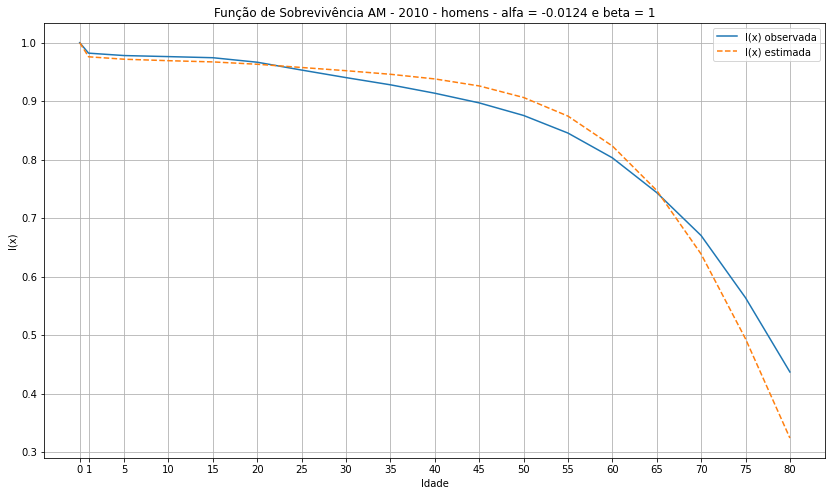

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='l(x)',
       title='Função de Sobrevivência AM - 2010 - homens - alfa = %s e beta = %s' % (round(alfa,4), round(1,4)));

x = dfTabuaAM["Idade"]
ax.set_xticks(x)

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabua["l(x)"], linestyle='solid', label="l(x) observada")
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dashed', label="l(x) estimada")

plt.grid(True)
plt.legend();
fig.savefig('img/1-FuncSobrevida-AM-2010.png')

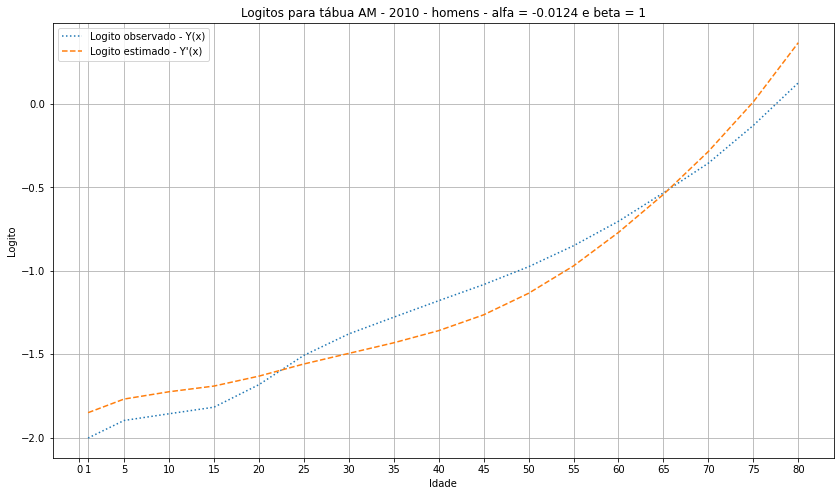

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='Logito',
       title='Logitos para tábua AM - 2010 - homens - alfa = %s e beta = %s' % (round(alfa,4), 1));

plt.plot(x, dfTabua["Y(x)"], linestyle='dotted', label="Logito observado - Y(x)")
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dashed', label="Logito estimado - Y'(x)")

ax.set_xticks(x)
plt.grid(True)
plt.legend();
fig.savefig('img/2-Logito-AM-2010.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

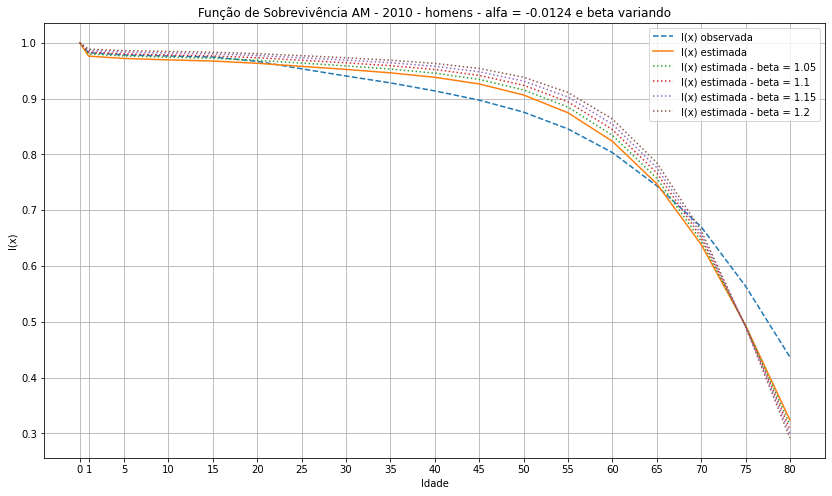

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='l(x)',
       title='Função de Sobrevivência AM - 2010 - homens - alfa = %s e beta variando' % (round(alfa,4)));

plt.plot(x, dfTabua["l(x)"], linestyle='dashed', label="l(x) observada")

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='solid', label="l(x) estimada")

dfTabuaAM = novaTabua(1.05,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 1.05)

dfTabuaAM = novaTabua(1.1,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 1.1)

dfTabuaAM = novaTabua(1.15,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 1.15)

dfTabuaAM = novaTabua(1.2,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 1.2)

plt.grid(True)
ax.set_xticks(x)
plt.legend();
fig.savefig('img/3-FuncSobrevida-AM-2010-betaVariando.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

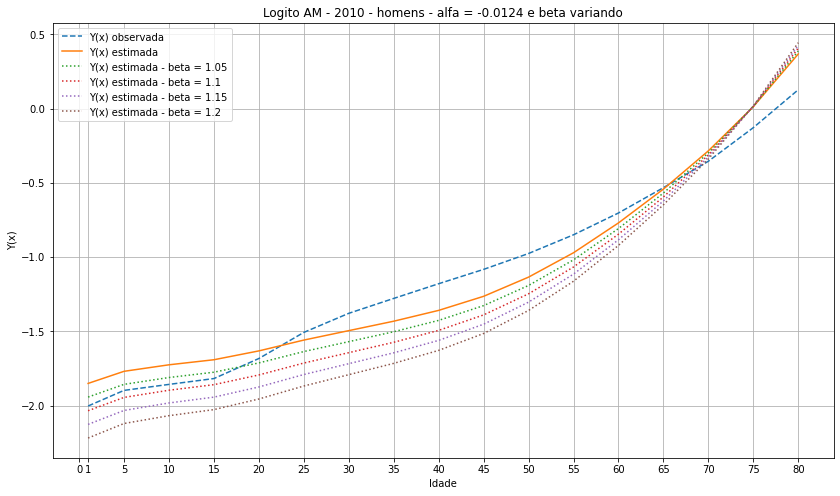

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='Y(x)',
       title='Logito AM - 2010 - homens - alfa = %s e beta variando' % (round(alfa,4)));

plt.plot(x, dfTabua["Y(x)"], linestyle='dashed', label="Y(x) observada")

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='solid', label="Y(x) estimada")

dfTabuaAM = novaTabua(1.05,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 1.05)

dfTabuaAM = novaTabua(1.1,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 1.1)

dfTabuaAM = novaTabua(1.15,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 1.15)

dfTabuaAM = novaTabua(1.2,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 1.2)

plt.grid(True)
ax.set_xticks(x)
plt.legend();
fig.savefig('img/4-Logito-AM-2010-betaVariando.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

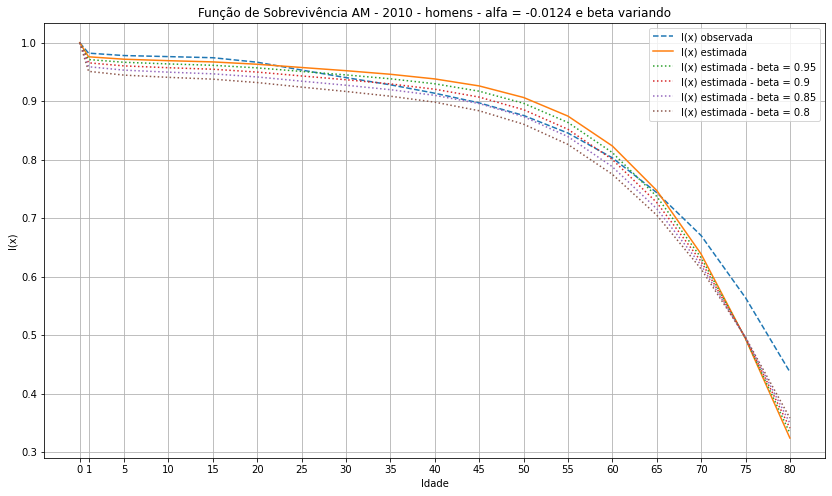

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='l(x)',
       title='Função de Sobrevivência AM - 2010 - homens - alfa = %s e beta variando' % (round(alfa,4)));

plt.plot(x, dfTabua["l(x)"], linestyle='dashed', label="l(x) observada")

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='solid', label="l(x) estimada")

dfTabuaAM = novaTabua(0.95,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 0.95)

dfTabuaAM = novaTabua(0.9,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 0.90)

dfTabuaAM = novaTabua(0.85,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 0.85)

dfTabuaAM = novaTabua(0.8,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % 0.80)

plt.grid(True)
ax.set_xticks(x)
plt.legend();
fig.savefig('img/5-FuncSobrevida-AM-2010-betaVariando2.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

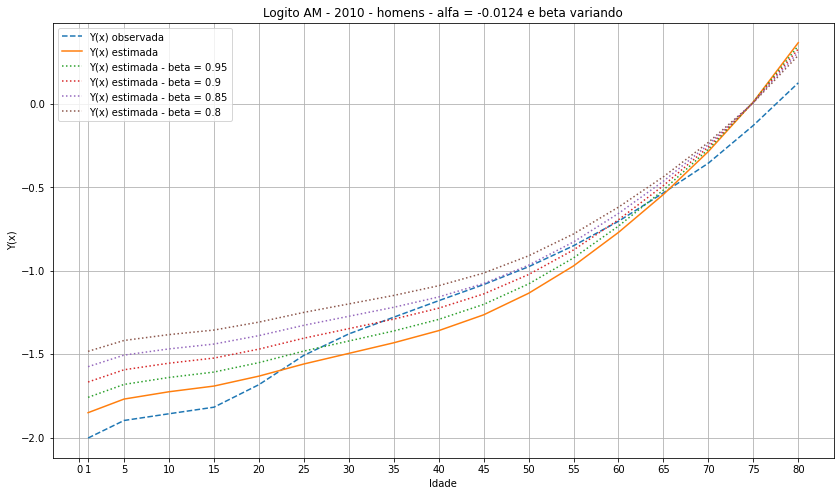

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='Y(x)',
       title='Logito AM - 2010 - homens - alfa = %s e beta variando' % (round(alfa,4)));

plt.plot(x, dfTabua["Y(x)"], linestyle='dashed', label="Y(x) observada")

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='solid', label="Y(x) estimada")

dfTabuaAM = novaTabua(0.95,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 0.95)

dfTabuaAM = novaTabua(0.9,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 0.9)

dfTabuaAM = novaTabua(0.85,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 0.85)

dfTabuaAM = novaTabua(0.8,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="Y(x) estimada - beta = %s" % 0.8)

plt.grid(True)
ax.set_xticks(x)
plt.legend();
fig.savefig('img/6-Logito-AM-2010-betaVariando2.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

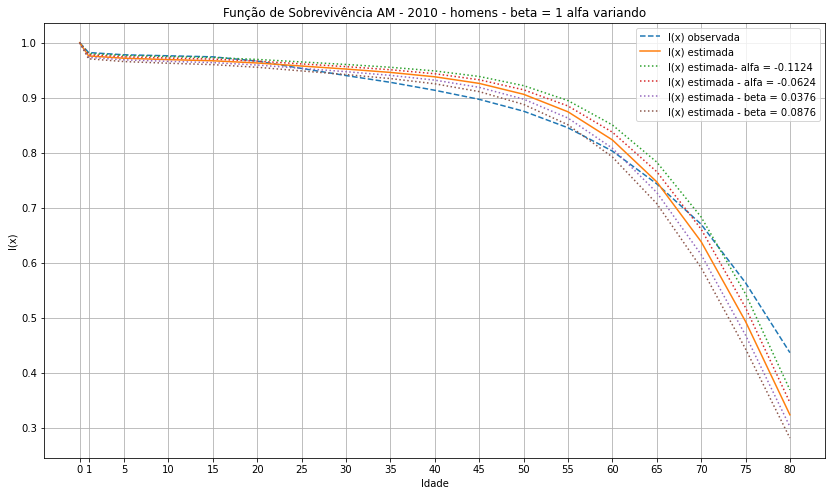

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='l(x)',
       title='Função de Sobrevivência AM - 2010 - homens - beta = 1 alfa variando');

plt.plot(x, dfTabua["l(x)"], linestyle='dashed', label="l(x) observada")

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='solid', label="l(x) estimada")

dfTabuaAM = novaTabua(1,alfa-0.1)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada- alfa = %s" % round((alfa-0.1),4))

dfTabuaAM = novaTabua(1,alfa-0.05)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - alfa = %s" % round((alfa-0.05),4))

dfTabuaAM = novaTabua(1,alfa+0.05)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % round((alfa+0.05),4))

dfTabuaAM = novaTabua(1,alfa+0.1)
plt.plot(x, dfTabuaAM["l'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % round((alfa+0.1),4))

plt.grid(True)
ax.set_xticks(x)
plt.legend();
fig.savefig('img/7-FuncSobrevida-AM-2010-alfaVariando.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

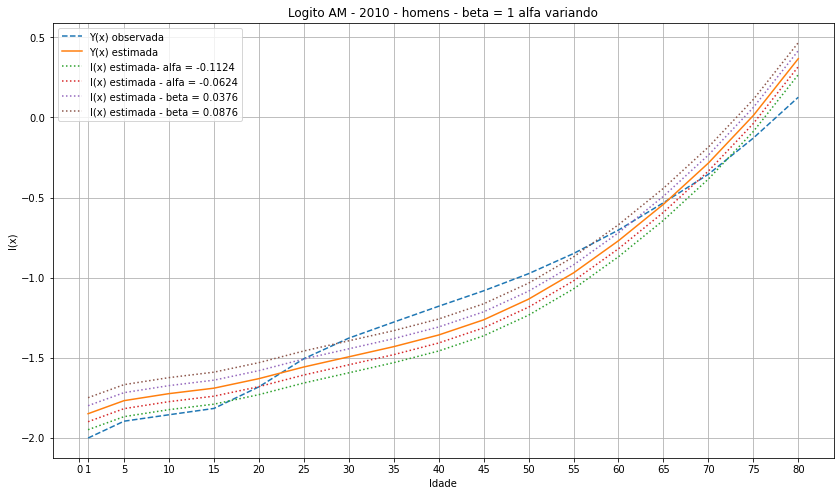

In [15]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='l(x)',
       title='Logito AM - 2010 - homens - beta = 1 alfa variando');

plt.plot(x, dfTabua["Y(x)"], linestyle='dashed', label="Y(x) observada")

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='solid', label="Y(x) estimada")

dfTabuaAM = novaTabua(1,alfa-0.1)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="l(x) estimada- alfa = %s" % round((alfa-0.1),4))

dfTabuaAM = novaTabua(1,alfa-0.05)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="l(x) estimada - alfa = %s" % round((alfa-0.05),4))

dfTabuaAM = novaTabua(1,alfa+0.05)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % round((alfa+0.05),4))

dfTabuaAM = novaTabua(1,alfa+0.1)
plt.plot(x, dfTabuaAM["Y'(x)"], linestyle='dotted', label="l(x) estimada - beta = %s" % round((alfa+0.1),4))

plt.grid(True)
ax.set_xticks(x)
plt.legend();
fig.savefig('img/8-Logito-AM-2010-alfaVariando.png')

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


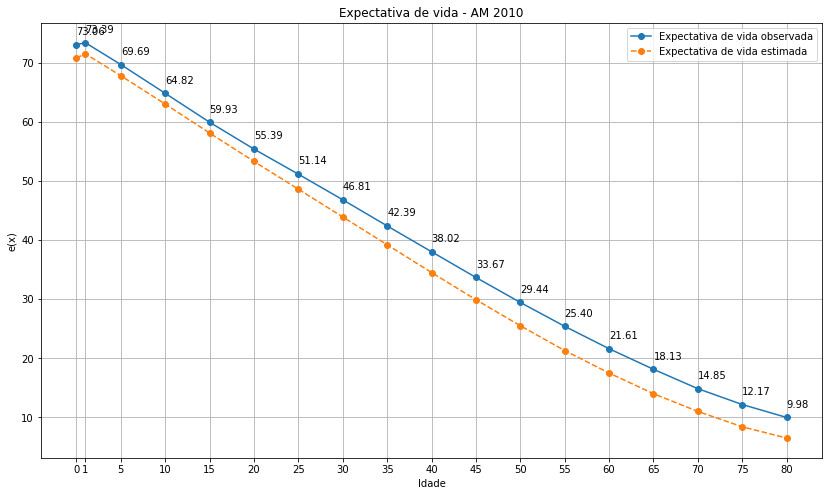

In [17]:
dfTabuaHomens = pd.read_csv("dados/Tabua-Homens-2010-AM.csv")
dfTabuaHomens

fig, ax = plt.subplots(figsize=(14,8))
ax.set(xlabel='Idade', ylabel='e(x)',
       title='Expectativa de vida - AM 2010');

x = dfTabuaAM["Idade"]
ax.set_xticks(x)

dfTabuaAM = novaTabua(1,alfa)
plt.plot(x, dfTabuaHomens["ex"], linestyle='solid', marker='o', label="Expectativa de vida observada")
plt.plot(x, dfTabuaAM["e(x)"], linestyle='dashed', marker='o', label="Expectativa de vida estimada ")


for x,y in zip(x,dfTabuaHomens["ex"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.grid(True)
plt.legend();
fig.savefig('img/9-expectativa_de_vida-AM-2010.png')